In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

In [2]:
def processing_df(cbc):
    cbc = cbc.reset_index(drop=True)
    
    
    # removes all un-named columns from dataset
    cbc = cbc.loc[:, ~cbc.columns.str.contains('^Unnamed')]
    
    
    # removing patient personal info columns
    cbc = cbc.drop(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
                     'Sample No.', 'Sample Inf.', 'Order Type', 'Reception Date',
                     'Measurement Mode', 'Patient ID', 'Analysis Info.', 'Error(Func.)',
                     'Error(Result)', 'Order Info.', 'WBC Info.', 'PLT Info.',
                     'Rule Result', 'Validate', 'Validator', 
                     'Action Message (Check)', 'Action Message (Review)',
                     'Action Message (Retest)', 'Sample Comment', 'Patient Name',
                     'Birth', 'Sex', 'Patient Comment', 'Ward Name', 'Doctor Name',
                     'Output', 'Sequence No.', 'Discrete', 'Q-Flag(Blasts/Abn Lympho?)',
                     'Q-Flag(Blasts?)', 'Q-Flag(Abn Lympho?)'], axis=1)

    
    # grouping numeric categorical columns
    catag_data = ['WBC Abnormal', 'WBC Suspect', 'RBC Abnormal', 'RBC Suspect',
                     'PLT Abnormal', 'PLT Suspect','IP ABN(WBC)WBC Abn Scattergram', 
                     'IP ABN(WBC)Neutropenia',
                     'IP ABN(WBC)Neutrophilia', 'IP ABN(WBC)Lymphopenia',
                     'IP ABN(WBC)Lymphocytosis', 'IP ABN(WBC)Monocytosis',
                     'IP ABN(WBC)Eosinophilia', 'IP ABN(WBC)Basophilia',
                     'IP ABN(WBC)Leukocytopenia', 'IP ABN(WBC)Leukocytosis',
                     'IP ABN(WBC)NRBC Present', 'IP ABN(WBC)IG Present',
                     'IP ABN(RBC)RBC Abn Distribution', 'IP ABN(RBC)Dimorphic Population',
                     'IP ABN(RBC)Anisocytosis', 'IP ABN(RBC)Microcytosis',
                     'IP ABN(RBC)Macrocytosis', 'IP ABN(RBC)Hypochromia',
                     'IP ABN(RBC)Anemia', 'IP ABN(RBC)Erythrocytosis',
                     'IP ABN(RBC)RET Abn Scattergram', 'IP ABN(RBC)Reticulocytosis',
                     'IP ABN(PLT)PLT Abn Distribution', 'IP ABN(PLT)Thrombocytopenia',
                     'IP ABN(PLT)Thrombocytosis', 'IP ABN(PLT)PLT Abn Scattergram',
                     'IP SUS(WBC)Blasts/Abn Lympho?', 'IP SUS(WBC)Blasts?',
                     'IP SUS(WBC)Abn Lympho?', 'IP SUS(WBC)Left Shift?',
                     'IP SUS(WBC)Atypical Lympho?', 'IP SUS(RBC)RBC Agglutination?',
                     'IP SUS(RBC)Turbidity/HGB Interf?', 'IP SUS(RBC)Iron Deficiency?',
                     'IP SUS(RBC)HGB Defect?', 'IP SUS(RBC)Fragments?',
                     'IP SUS(PLT)PLT Clumps?']

    cbc[catag_data] = cbc[catag_data].fillna(value=0)
    
    
    # grouping descriptive categorical columns
    cbc['Judgment'] = cbc['Judgment'].map({'Positive': 1, 'Negative': 0})

    cbc['Positive(Diff.)'] = cbc['Positive(Diff.)'].map({'Diff.': 1})

    cbc['Positive(Morph.)'] = cbc['Positive(Morph.)'].map({'Morph.': 1})

    cbc['Positive(Count)'] = cbc['Positive(Count)'].map({'Count': 1})

    
    # replacing all NaN vallues by 0 as per suggested by the domain expert
    cbc[['Judgment', 'Positive(Diff.)', 'Positive(Count)', 'Positive(Morph.)']] = cbc[
            ['Judgment', 'Positive(Diff.)', 'Positive(Count)', 'Positive(Morph.)']].fillna(value=0)
 

    # grouping columns having signed values only
    signed_col = list(cbc.loc[:, cbc.columns.str.contains('/M')])
    cbc[signed_col] = cbc[signed_col].replace('+' , 1)
    cbc[signed_col] = cbc[signed_col].replace('-', -1)
    cbc[signed_col] = cbc[signed_col].replace(np.NaN , 0)
    
    #1
    unknown_values = ['*', '@' , '    ']
    cbc = cbc.replace(unknown_values, np.NaN)
    
    #2
    new = pd.DataFrame()
    new['NULL'] = cbc.isnull().sum()
    new['percen']=new['NULL']/len(cbc) *100
    new['column'] = cbc.columns
    
    #3
    new_filter = new[new['percen'] > 60]
    # converting it into list
    new_filter_col = new_filter['column'].to_list()
    
    
    # grouping (continuous) numeric data columns
    numeric_data = ['Q-Flag(Left Shift?)', 'Q-Flag(Atypical Lympho?)', 'Q-Flag(RBC Agglutination?)',
                 'Q-Flag(Turbidity/HGB Interf?)', 'Q-Flag(Iron Deficiency?)', 'Q-Flag(HGB Defect?)',
                 'Q-Flag(Fragments?)', 'Q-Flag(PLT Clumps?)', 'WBC(10^9/L)', 'RBC(10^12/L)',
                 'HGB(g/dL)', 'HCT(%)', 'MCV(fL)', 'MCH(pg)', 'MCHC(g/dL)', 'PLT(10^3/uL)',
                 'RDW-SD(fL)', 'RDW-CV(%)', 'PDW(fL)', 'MPV(fL)', 'P-LCR(%)', 'PCT(%)',
                 'NRBC#(10^3/uL)', 'NRBC%(%)', 'NEUT#(10^3/uL)', 'LYMPH#(10^3/uL)', 'MONO#(10^3/uL)',
                 'EO#(10^3/uL)', 'BASO#(10^3/uL)', 'NEUT%(%)', 'LYMPH%(%)', 'MONO%(%)', 'EO%(%)',
                 'BASO%(%)', 'IG#(10^3/uL)', 'IG%(%)', 'RET%(%)', 'RET#(10^9/L)', 'IRF(%)',
                 'LFR(%)', 'MFR(%)', 'HFR(%)', 'RET-He(pg)', 'IPF(%)', '[PLT-I(10^3/uL)]',
                 '[MicroR(%)]', '[MacroR(%)]', '[TNC(10^9/L)]', '[WBC-N(10^9/L)]', '[TNC-N(10^9/L)]',
                 '[BA-N#(10^3/uL)]', '[BA-N%(%)]', '[WBC-D(10^9/L)]', '[TNC-D(10^9/L)]',
                 '[NEUT#&(10^3/uL)]', '[NEUT%&(%)]', '[LYMP#&(10^3/uL)]', '[LYMP%&(%)]',
                 '[HFLC#(10^3/uL)]', '[HFLC%(%)]', '[BA-D#(10^3/uL)]', '[BA-D%(%)]', '[NE-SSC(ch)]',
                 '[NE-SFL(ch)]', '[NE-FSC(ch)]', '[LY-X(ch)]', '[LY-Y(ch)]', '[LY-Z(ch)]',
                 '[MO-X(ch)]', '[MO-Y(ch)]', '[MO-Z(ch)]', '[NE-WX]', '[NE-WY]', '[NE-WZ]',
                 '[LY-WX]', '[LY-WY]', '[LY-WZ]', '[MO-WX]', '[MO-WY]', '[MO-WZ]', '[WBC-P(10^9/L)]',
                 '[TNC-P(10^9/L)]', '[RBC-O(10^12/L)]', '[PLT-O(10^3/uL)]', '[RBC-He(pg)]',
                 '[Delta-He(pg)]', '[RET-Y(ch)]', '[RET-RBC-Y(ch)]', '[IRF-Y(ch)]', '[FRC#(10^12/L)]',
                 '[FRC%(%)]', '[HYPO-He(%)]', '[HYPER-He(%)]', '[RPI]', '[RET-UPP]', '[RET-TNC]',
                 '[PLT-F(10^3/uL)]', '[H-IPF(%)]', '[IPF#(10^3/uL)]', 'WBC-BF(10^3/uL)',
                 'RBC-BF(10^6/uL)', 'MN#(10^3/uL)', 'PMN#(10^3/uL)', 'MN%(%)', 'PMN%(%)',
                 'TC-BF#(10^3/uL)', '[HF-BF#(10^3/uL)]', '[HF-BF%(/100WBC)]', '[NE-BF#(10^3/uL)]',
                 '[NE-BF%(%)]', '[LY-BF#(10^3/uL)]', '[LY-BF%(%)]', '[MO-BF#(10^3/uL)]', '[MO-BF%(%)]',
                 '[EO-BF#(10^3/uL)]', '[EO-BF%(%)]', '[RBC-BF2(10^6/uL)]', 'HPC#(10^3/uL)',
                 '[HGB-O(g/dL)]', '[PLT-F2(10^3/uL)]', 'IP SUS(RBC)pRBC?', 'Q-Flag(pRBC?)',
                 '[Delta-HGB(g/dL)]', '[MCHC-O(g/dL)]', '[WBC(10^3/uL)]', '[RBC(10^6/uL)]',
                 '[RBC-I(10^6/uL)]', '[RBC-O(10^6/uL)]', '[NEUT#(10^3/uL)]', '[LYMPH#(10^3/uL)]',
                 '[MONO#(10^3/uL)]', '[EO#(10^3/uL)]', '[NEUT%(%)]', '[LYMPH%(%)]', '[MONO%(%)]',
                 '[EO%(%)]', '[MN#(10^3/uL)]', '[PMN#(10^3/uL)]', '[HF#(10^3/uL)]', '[MN%(%)]',
                 '[PMN%(%)]', '[HF%(/100WBC)]', '[TC#(10^3/uL)]', '[HPC%(%)]']
    unknown_values = ['ERROR' , '----' , '++++' , '*', '@' , '    ']
    cbc[numeric_data] = cbc[numeric_data].replace(unknown_values, np.NaN)
    
    # for filling null values in column that have some numeric values in it i.e. some mean can be generated 
    cbc[numeric_data] = cbc[numeric_data].fillna(value=cbc[numeric_data].mean())
    
    # for filling null values in column that have no numeric values in it i.e. no mean can be generated so replacing it by 0 
    cbc[numeric_data] = cbc[numeric_data].fillna(value=0)
    
    # scaling all parameters in order to have equal weightage in the model training
    numeric_df = pd.DataFrame(cbc[numeric_data])
    scaler = StandardScaler()
    standard_cbc = scaler.fit_transform(numeric_df)
    standard_cbc = pd.DataFrame(standard_cbc, columns=numeric_data)

    cbc[numeric_data] = standard_cbc

    
    #4
    # dropping col having null values > 60
    cbc = cbc.drop(new_filter_col, axis = 1)
    
    
    # omitting un-needed column from dataset  
    col_names = pd.Series(cbc.columns)
    omit_col_contining = ['TNC', '/M']
    filter_col = col_names[col_names.str.contains('|'.join(omit_col_contining))]
    keep_col = list(filter_col)
    cbc = cbc.drop(keep_col, axis=1)
    
    #5
    #changing all data types to float
    cbc = cbc.astype(float)
    return cbc

In [3]:
# index_col = False --> not to use the first col as index
cbc = pd.read_csv("ResearchCBC_data_final.csv", index_col=False)
cbc

,Code,Nickname,Analyzer ID,Date,Time,Rack,Position,Sample No.,Sample Inf.,Order Type,...,[MN%(%)],[MN%/M],[PMN%(%)],[PMN%/M],[HF%(/100WBC)],[HF%/M],[TC#(10^3/uL)],[TC#/M],[HPC%(%)],[HPC%/M]
0,99,XN-1000-1-A,XN-20^11551,10/7/2017,10:28:14,1,2.0,NBD/1617/021437,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
1,99,XN-1000-1-A,XN-20^11551,9/1/2014,11:18:16,17,1.0,3D-5,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
2,99,XN-1000-1-A,XN-20^11551,12/11/2014,19:49:23,1,1.0,ERR000000000001,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
3,99,XN-1000-1-A,XN-20^11551,6/29/2016,10:57:59,16,1.0,3D-143,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
4,99,XN-1000-1-A,XN-20^11551,12/11/2014,19:56:06,2,1.0,3D-69,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,1,XN-1000-1-A,XN-20^11551,1/13/2014,10:47:03,11,1.0,3D-62,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
1413,1,XN-1000-1-A,XN-20^11551,1/10/2014,10:11:38,9,1.0,3D-52,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
1414,1,XN-1000-1-A,XN-20^11551,1/8/2014,10:06:16,7,1.0,3D-40,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
1415,1,XN-1000-1-A,XN-20^11551,1/6/2014,11:38:28,19,2.0,3D-28,A,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN


In [4]:
unique_val = cbc['Code'].unique()
unique_val

array([99, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11,
       10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [5]:
cbc = cbc.reset_index(drop=True)
cbc

,Code,Nickname,Analyzer ID,Date,Time,Rack,Position,Sample No.,Sample Inf.,Order Type,...,[MN%(%)],[MN%/M],[PMN%(%)],[PMN%/M],[HF%(/100WBC)],[HF%/M],[TC#(10^3/uL)],[TC#/M],[HPC%(%)],[HPC%/M]
0,99,XN-1000-1-A,XN-20^11551,10/7/2017,10:28:14,1,2.0,NBD/1617/021437,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
1,99,XN-1000-1-A,XN-20^11551,9/1/2014,11:18:16,17,1.0,3D-5,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
2,99,XN-1000-1-A,XN-20^11551,12/11/2014,19:49:23,1,1.0,ERR000000000001,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
3,99,XN-1000-1-A,XN-20^11551,6/29/2016,10:57:59,16,1.0,3D-143,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
4,99,XN-1000-1-A,XN-20^11551,12/11/2014,19:56:06,2,1.0,3D-69,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,1,XN-1000-1-A,XN-20^11551,1/13/2014,10:47:03,11,1.0,3D-62,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
1413,1,XN-1000-1-A,XN-20^11551,1/10/2014,10:11:38,9,1.0,3D-52,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
1414,1,XN-1000-1-A,XN-20^11551,1/8/2014,10:06:16,7,1.0,3D-40,M,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN
1415,1,XN-1000-1-A,XN-20^11551,1/6/2014,11:38:28,19,2.0,3D-28,A,Initial,...,,NaN,,NaN,,NaN,,NaN,,NaN


cbc = cbc.drop(catag_data, axis=1)
cbc = cbc.drop(['Judgment', 'Positive(Diff.)', 'Positive(Count)', 'Positive(Morph.)'], axis=1)
cbc = cbc.drop(signed_col, axis=1)
cbc.to_csv("C:\\Users\\User\\Desktop\\copied folder\\ModelTraning (different synthetic data)\\temporary\\supposed_numeric.csv", index=False)
cbc

In [6]:
cbc.shape

(1417, 434)

## Data Splitting

In [7]:
# store the feature matrix (X) and response vector (y)
X = cbc.iloc[:, 1:]
y = cbc.iloc[:, 0]

In [8]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
# rearranging indexes of train_sets and test_set in order to do standardization on X sets
# there is a glitch that happens if indexes are not rearranged
# i.e. train set has 68 column which are selected randomly from the entire cbc dataset
# when strandardization is done on this train set it changes all records to NaN vallue if it has a index number > 68

# drop = True, drops the additional column of original indexes from dataframe that is made by default
# by default drop = False
X_train = X_train.reset_index(drop=True)

# reseting indexes of y_train, X_test and y_test as well
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [10]:
# note that an additional column of orginal indexes
X_train

,Nickname,Analyzer ID,Date,Time,Rack,Position,Sample No.,Sample Inf.,Order Type,Reception Date,...,[MN%(%)],[MN%/M],[PMN%(%)],[PMN%/M],[HF%(/100WBC)],[HF%/M],[TC#(10^3/uL)],[TC#/M],[HPC%(%)],[HPC%/M]
0,XN-1000-1-A,XN-20^11551,5/14/2014,9:17:24,5,1.0,3D-81,M,Initial,5/14/2014 9:15,...,,NaN,,NaN,,NaN,,NaN,,NaN
1,XN-1000-1-A,XN-20^11551,6/23/2014,14:06:27,33,1.0,3D-138,M,Initial,6/23/2014 14:04,...,,NaN,,NaN,,NaN,,NaN,,NaN
2,XN-1000-1-A,XN-20^11551,7/2/2014,12:27:34,16,1.0,3D-06,M,Initial,7/2/2014 12:25,...,,NaN,,NaN,,NaN,,NaN,,NaN
3,XN-1000-1-A,XN-20^11551,7/14/2014,12:32:22,16,1.0,3D-72R,M,Initial,7/14/2014 12:30,...,,NaN,,NaN,,NaN,,NaN,,NaN
4,XN-1000-1-A,XN-20^11551,10/17/2014,11:46:42,20,2.0,3D-56,A,Initial,10/17/2014 11:43,...,,NaN,,NaN,,NaN,,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,XN-1000-1-A,XN-20^11551,8/20/2014,11:08:31,16,2.0,3D-123,A,Initial,8/20/2014 11:05,...,,NaN,,NaN,,NaN,,NaN,,NaN
1129,XN-1000-1-A,XN-20^11551,5/26/2014,10:41:10,9,1.0,3D-171,M,Initial,5/26/2014 10:39,...,,NaN,,NaN,,NaN,,NaN,,NaN
1130,XN-1000-1-A,XN-20^11551,8/21/2014,15:20:23,36,1.0,3D-134,M,Initial,8/21/2014 15:18,...,,NaN,,NaN,,NaN,,NaN,,NaN
1131,XN-1000-1-A,XN-20^11551,2/12/2014,11:37:30,17,2.0,3D-54,A,Initial,2/12/2014 11:34,...,,NaN,,NaN,,NaN,,NaN,,NaN


In [11]:
X_train = processing_df(X_train)
X_train

C:\Users\AREEBA~1\AppData\Local\Temp/ipykernel_21768/503429220.py:120: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cbc[numeric_data] = cbc[numeric_data].fillna(value=cbc[numeric_data].mean())


,Judgment,Positive(Diff.),Positive(Morph.),Positive(Count),WBC Abnormal,WBC Suspect,RBC Abnormal,RBC Suspect,PLT Abnormal,PLT Suspect,...,[HYPO-He(%)],[HYPER-He(%)],[RPI],[RET-UPP],[PLT-F(10^3/uL)],[H-IPF(%)],[IPF#(10^3/uL)],[HGB-O(g/dL)],[PLT-F2(10^3/uL)],Q-Flag(pRBC?)
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,3.153159,-0.934788,-0.237784,0.190967,0.347179,0.178445,2.334426,1.309971,-0.684612,-0.089549
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.189185,-0.512157,0.464413,-0.165601,0.051271,-0.179392,0.352237,-1.282653,-0.633034,-0.089549
2,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.618792,0.333107,-0.003719,-0.165601,-0.938492,-0.288299,-0.918641,0.957886,1.119539,-0.089549
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,-0.638791,-0.512157,-0.549872,-0.112116,-1.045631,0.053980,-0.985030,0.029663,0.854128,-0.089549
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-0.650791,-0.089525,-0.315806,-0.112116,0.296161,-0.537229,-0.634116,0.189701,5.605202,-0.089549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.654791,0.755739,0.152325,-0.147772,-0.617074,-0.474997,-0.785863,0.893871,-0.584142,-0.089549
1129,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,3.061160,-0.934788,-0.315806,-0.165601,0.357383,-0.474997,-0.330623,-1.314661,-0.291868,-0.089549
1130,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,-0.618792,-0.089525,-0.315806,-0.165601,-0.999714,0.629631,-0.833284,0.381748,-0.654525,-0.089549
1131,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.377195,-0.512157,-0.315806,-0.112116,0.347179,-0.366090,0.162553,-0.290414,-1.083266,-0.089549


In [12]:
## checking again for null values in "cbc" dataframe
np.array(X_train.isna().sum(axis=0))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
X_test = processing_df(X_test)
X_test

C:\Users\AREEBA~1\AppData\Local\Temp/ipykernel_21768/503429220.py:120: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cbc[numeric_data] = cbc[numeric_data].fillna(value=cbc[numeric_data].mean())


,Judgment,Positive(Diff.),Positive(Morph.),Positive(Count),WBC Abnormal,WBC Suspect,RBC Abnormal,RBC Suspect,PLT Abnormal,PLT Suspect,...,[HYPO-He(%)],[HYPER-He(%)],[RPI],[RET-UPP],[PLT-F(10^3/uL)],[H-IPF(%)],[IPF#(10^3/uL)],[HGB-O(g/dL)],[PLT-F2(10^3/uL)],Q-Flag(pRBC?)
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,-0.585069,0.664642,3.284039,-0.058751,0.257222,-0.133808,0.911807,0.678422,6.019806,-1.273686e-01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.663136,0.664642,-0.041214,-0.209885,-0.033315,-0.495854,-0.882878,1.914997,0.232663,2.037819e-17
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.525589,0.004648,-0.174225,0.001703,-0.734394,1.810515,1.330567,-0.056839,-0.627596,-1.273686e-01
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.288535,-0.655346,-0.307235,0.364425,0.989881,-0.321536,0.503017,1.346841,0.117714,-1.273686e-01
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,-0.573916,0.004648,-0.972285,-0.149431,-1.195463,0.000283,-0.972613,0.912368,0.991745,-1.273686e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.659418,0.664642,1.953937,0.243518,-0.627021,1.770288,1.958706,-2.931041,-1.026471,-1.273686e-01
280,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.644548,1.324636,0.224806,-0.149431,-0.595441,0.952331,1.520006,-1.059468,0.848722,-1.273686e-01
281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.503285,0.004648,-0.174225,0.062157,-0.507017,-0.281308,-0.454148,-0.056839,-1.027531,-1.273686e-01
282,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,-0.618526,0.004648,0.357816,-0.209885,-1.018615,-0.294717,-0.823055,-1.059468,-0.664676,-1.273686e-01


## Model Training

In [14]:
# commonly used library for all models
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#### APPLYING NAIVE BAYES

In [15]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

In [16]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Gaussian Naive Bayes model")
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("F1 score(in %):", f1_score(y_test, y_pred, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, y_pred, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred, average="macro")*100)

Gaussian Naive Bayes model
Accuracy(in %): 15.140845070422534
F1 score(in %): 7.59334840334154
Precision score(in %): 7.335373266375155
Recall score(in %): 11.125903082424822


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### APPLYING LOGISTIC REGRESSION

In [17]:
#Training the model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# making predictions on the testing set
y_pred = LR.predict(X_test)
#Finding the confusion matrix
from sklearn.metrics import mean_squared_error, confusion_matrix
MSE = mean_squared_error(y_test, y_pred)
print(MSE)

475.59507042253523


In [19]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logestic model")
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("F1 score(in %):", f1_score(y_test, y_pred, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, y_pred, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred, average="macro")*100)

Logestic model
Accuracy(in %): 17.6056338028169
F1 score(in %): 11.426330548871011
Precision score(in %): 12.836736908578757
Recall score(in %): 11.9386907980658


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### APPLYING SUPPORT VECTOR MACHINE CLASSIFIER

In [20]:
# PART 1
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [21]:
# making predictions on the testing set
predictions = model.predict(X_test)

In [22]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Support vector machine classifier model (1):")
print("Accuracy(in %):", accuracy_score(y_test, predictions)*100)
print("F1 score(in %):", f1_score(y_test, predictions, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, predictions, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, predictions, average="macro")*100)

Support vector machine classifier model (1):
Accuracy(in %): 19.014084507042252
F1 score(in %): 6.516089132672056
Precision score(in %): 6.3060071340629795
Recall score(in %): 9.902398179572094


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#PART 2

# Alter SVM with some parameters
model_poly = SVC(kernel='poly', degree=7, gamma=2)
model_poly.fit(X_train, y_train)

SVC(degree=7, gamma=2, kernel='poly')

In [24]:
# making predictions on the testing set
y_pred_poly = model_poly.predict(X_test)

In [25]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Support vector machine classifier model (2):")
print("Accuracy(in %):", accuracy_score(y_test, y_pred_poly)*100)
print("F1 score(in %):", f1_score(y_test, y_pred_poly, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, y_pred_poly, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred_poly, average="macro")*100)

Support vector machine classifier model (2):
Accuracy(in %): 16.549295774647888
F1 score(in %): 6.451986744408754
Precision score(in %): 6.3698937058959455
Recall score(in %): 8.469024801377742


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# PART 3

# Alter SVM with some parameters
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
#print("Accuracy = ", (round((accuracy_score(y_test, predictions_linear))*100)))

SVC(kernel='linear')

In [27]:
# making predictions on the testing set
predictions_linear = model_linear.predict(X_test)

In [28]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Support vector machine classifier model (3):")
print("Accuracy(in %):", accuracy_score(y_test, predictions_linear)*100)
print("F1 score(in %):", f1_score(y_test, predictions_linear, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, predictions_linear, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred_poly, average="macro")*100)

Support vector machine classifier model (3):
Accuracy(in %): 17.95774647887324
F1 score(in %): 12.007876127601403
Precision score(in %): 13.909829958455793
Recall score(in %): 8.469024801377742


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# PART 4

# Alter SVM with some parameters
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [30]:
# making predictions on the testing set
predictions_sig = model_linear.predict(X_test)

In [31]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Support vector machine classifier model (4):")
print("Accuracy(in %):", accuracy_score(y_test, predictions_sig)*100)
print("F1 score(in %):", f1_score(y_test, predictions_sig, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, predictions_sig, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, predictions_sig, average="macro")*100)

Support vector machine classifier model (4):
Accuracy(in %): 17.95774647887324
F1 score(in %): 12.007876127601403
Precision score(in %): 13.909829958455793
Recall score(in %): 11.797834985187926


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### APPLYING EXTRA TREE REGRESSOR FOR IMPORTANT FEATURE SELECTION

In [32]:
# Feature selection by ExtraTreesRegressor(model based)
from sklearn.ensemble import ExtraTreesRegressor
reg= ExtraTreesRegressor()
reg.fit(X_train, y_train)

reg.feature_importances_

array([4.50839392e-01, 1.38938179e-04, 9.53328973e-05, 1.96607389e-04,
       1.55361297e-04, 1.30880420e-04, 2.53454309e-04, 1.29237042e-04,
       3.09880028e-04, 3.18657513e-05, 1.57553458e-04, 9.82470267e-05,
       9.04908488e-05, 1.16332258e-04, 1.83444222e-04, 2.72415816e-04,
       9.15169849e-05, 8.58819167e-06, 6.82887303e-05, 6.91092105e-05,
       3.64763756e-05, 1.22730739e-04, 3.79924181e-05, 1.44320601e-05,
       3.19530905e-04, 2.44748046e-04, 2.03288482e-05, 6.80184085e-05,
       1.12799953e-04, 6.10157593e-06, 8.13823435e-05, 7.10554698e-05,
       2.81672223e-04, 1.31770517e-04, 5.04343364e-05, 4.24087502e-08,
       1.87134869e-04, 4.40158295e-04, 8.70414577e-05, 3.12526915e-05,
       1.30576222e-04, 1.88957302e-06, 8.53503758e-05, 3.66779053e-05,
       2.97265731e-05, 9.67237721e-05, 4.00757013e-05, 2.04602036e-04,
       2.63502010e-04, 1.89919559e-04, 2.18827622e-04, 3.00101670e-04,
       3.49702195e-04, 3.28804471e-04, 3.31734317e-04, 1.97627510e-04,
      

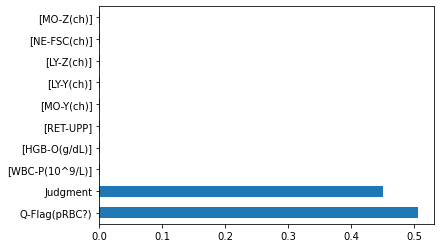

In [33]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

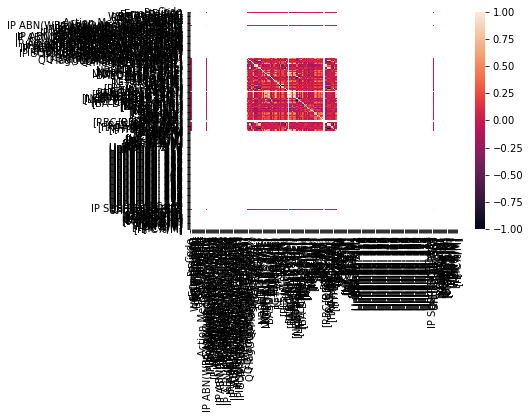

In [34]:
# Creating heat map for correlation study
import seaborn as sns
corr = cbc.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

#### APPLYING DECISION TREE CLASSIFIER

In [35]:
from sklearn.tree import DecisionTreeClassifier
decision_model=DecisionTreeClassifier()
# fit independent varaibles to the dependent variables
decision_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
# making predictions on the testing set
y_pred = decision_model.predict(X_test)

In [37]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Decision Tree Classifier model (4):")
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("F1 score(in %):", f1_score(y_test, y_pred, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, y_pred, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred, average="macro")*100)

Decision Tree Classifier model (4):
Accuracy(in %): 17.253521126760564
F1 score(in %): 10.712390967155523
Precision score(in %): 12.576823266630221
Recall score(in %): 10.094115413559859


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### APPLYING K-NEAREST NEIGHBOR(KNN)

In [38]:
# KNN Classifier
#The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, 
#it becomes difficult for the algorithm to calculate the distance in each dimension.
N=len(X_train)
from math import sqrt
k = int(sqrt(N/2))

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=k)
knn_model = model.fit(X_train, y_train)

In [40]:
# making predictions on the testing set
y_pred = knn_model.predict(X_test)

In [41]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("KNN model")
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("F1 score(in %):", f1_score(y_test, y_pred, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, y_pred, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred, average="macro")*100)

KNN model
Accuracy(in %): 20.070422535211268
F1 score(in %): 8.64662799094501
Precision score(in %): 8.304874295634503
Recall score(in %): 12.205378036899775


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### RANDOM FOREST

In [42]:
from sklearn.ensemble import RandomForestClassifier
rn_model = RandomForestClassifier(n_estimators = 100, random_state = 1)
rn_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [43]:
# making predictions on the testing set
y_pred = rn_model.predict(X_test)

In [44]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Random Forest Classifier model")
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("F1 score(in %):", f1_score(y_test, y_pred, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, y_pred, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred, average="macro")*100)

Random Forest Classifier model
Accuracy(in %): 22.887323943661972
F1 score(in %): 11.638478749327806
Precision score(in %): 11.902530719495005
Recall score(in %): 13.41435099247599


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# for creating model file to be used in flask app
#pickle.dump(rn_model, open('rn_model.pkl', 'wb'))

#### STOCHASTIC GRADIENT DESCENT

In [46]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log", max_iter=20, penalty="elasticnet", random_state=1)
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(loss='log', max_iter=20, penalty='elasticnet', random_state=1)

In [47]:
# making predictions on the testing set
y_pred = clf.predict(X_test)

In [48]:
#comparing actual response values (y_test) with predicted response values (y_pred)
print("Stochastic Gradient Classifier model")
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)
print("F1 score(in %):", f1_score(y_test, y_pred, average="macro")*100)
print("Precision score(in %):", precision_score(y_test, y_pred, average="macro")*100)
print("Recall score(in %):", recall_score(y_test, y_pred, average="macro")*100)

Stochastic Gradient Classifier model
Accuracy(in %): 14.788732394366196
F1 score(in %): 8.739618157784214
Precision score(in %): 10.844982948086395
Recall score(in %): 9.105359442712384


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Artificial Neural Network

In [49]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [50]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(keras.Input(shape=(144,)))
classifier.add(Dense(200, activation="relu"))

# Adding the second hidden layer
classifier.add(Dense(200, activation="relu"))

# Adding the third hidden layer
classifier.add(Dense(200, activation="relu"))

# Adding the forth hidden layer
classifier.add(Dense(64, activation="relu"))

# Adding the fifth hidden layer
classifier.add(Dense(32, activation="relu"))

# Adding the sixth hidden layer
classifier.add(Dense(20, activation="relu"))


# Adding the output layer
classifier.add(Dense(1, activation="sigmoid"))

In [51]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [52]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
114/114 [==============================] - 1s 2ms/step - loss: -3140212.5000 - accuracy: 0.1518
Epoch 2/100
114/114 [==============================] - 0s 2ms/step - loss: -2709537792.0000 - accuracy: 0.1518
Epoch 3/100
114/114 [==============================] - 0s 2ms/step - loss: -119429922816.0000 - accuracy: 0.1518
Epoch 4/100
114/114 [==============================] - 0s 2ms/step - loss: -1565649272832.0000 - accuracy: 0.1518
Epoch 5/100
114/114 [==============================] - 0s 2ms/step - loss: -9504210026496.0000 - accuracy: 0.1518
Epoch 6/100
114/114 [==============================] - 0s 2ms/step - loss: -40394679123968.0000 - accuracy: 0.1518
Epoch 7/100
114/114 [==============================] - 0s 2ms/step - loss: -129295812919296.0000 - accuracy: 0.1518
Epoch 8/100
114/114 [==============================] - 0s 2ms/step - loss: -358011092598784.0000 - accuracy: 0.1518
Epoch 9/100
114/114 [==============================] - 0s 2ms/step - loss: -860655477325824.0

114/114 [==============================] - 0s 2ms/step - loss: -198427368128920944640.0000 - accuracy: 0.1518
Epoch 70/100
114/114 [==============================] - 0s 2ms/step - loss: -213817118033692327936.0000 - accuracy: 0.1518
Epoch 71/100
114/114 [==============================] - 0s 2ms/step - loss: -229905629568147914752.0000 - accuracy: 0.1518
Epoch 72/100
114/114 [==============================] - 0s 2ms/step - loss: -246766086226232475648.0000 - accuracy: 0.1518
Epoch 73/100
114/114 [==============================] - 0s 2ms/step - loss: -265010537752617287680.0000 - accuracy: 0.1518
Epoch 74/100
114/114 [==============================] - 0s 2ms/step - loss: -283936686488223219712.0000 - accuracy: 0.1518
Epoch 75/100
114/114 [==============================] - 0s 2ms/step - loss: -303875951625941024768.0000 - accuracy: 0.1518
Epoch 76/100
114/114 [==============================] - 0s 2ms/step - loss: -325187794303216254976.0000 - accuracy: 0.1518
Epoch 77/100
114/114 [=======